### INTRODUCTION

*This project focuses on using machine learning techniques to analyze and predict health outcomes based on a dataset containing demographic, clinical, and biometric data. The dataset includes features such as gender, age, BMI, hypertension, heart disease, HbA1c levels, and blood glucose levels, with a primary target variable indicating the presence of diabetes. The goal of this project is to explore the relationships between these variables through exploratory data analysis (EDA) and develop predictive models to classify individuals as diabetic or non-diabetic. By leveraging statistical insights and machine learning algorithms, this project aims to identify key risk factors for diabetes, uncover patterns in health metrics, and provide actionable insights to improve healthcare interventions and disease prevention strategies.*

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [38]:
df1=pd.read_csv(r'\Users\ansra\Downloads\diabetes_prediction_dataset.csv')
df=df1.sample(10000)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
90736,Male,14.0,0,0,No Info,17.33,3.5,80,0
57000,Female,80.0,0,0,not current,27.33,6.6,145,1
96556,Female,21.0,0,0,never,29.44,6.0,126,0
41385,Female,56.0,0,0,current,37.60,5.7,80,0
36770,Female,34.0,0,0,never,22.01,5.8,90,0
...,...,...,...,...,...,...,...,...,...
79366,Female,49.0,0,0,ever,24.69,3.5,140,0
23278,Female,39.0,0,0,former,44.64,6.2,159,1
95091,Male,72.0,1,0,former,24.42,6.6,85,0
55372,Female,47.0,0,0,never,27.32,5.8,130,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 90736 to 69750
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               10000 non-null  object 
 1   age                  10000 non-null  float64
 2   hypertension         10000 non-null  int64  
 3   heart_disease        10000 non-null  int64  
 4   smoking_history      10000 non-null  object 
 5   bmi                  10000 non-null  float64
 6   HbA1c_level          10000 non-null  float64
 7   blood_glucose_level  10000 non-null  int64  
 8   diabetes             10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 781.2+ KB


In [40]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000
mean,41.961684,0.072800,0.041900,27.464864,5.53278,138.314500,0.0882
std,22.323797,0.259821,0.200371,6.687985,1.06894,40.899712,0.2836
min,0.080000,0.000000,0.000000,10.340000,3.50000,80.000000,0.0000
25%,24.000000,0.000000,0.000000,23.720000,4.80000,100.000000,0.0000
50%,43.000000,0.000000,0.000000,27.320000,5.80000,140.000000,0.0000
75%,59.250000,0.000000,0.000000,29.820000,6.20000,159.000000,0.0000
max,80.000000,1.000000,1.000000,75.780000,9.00000,300.000000,1.0000


In [41]:
df.duplicated().sum()

55

In [42]:
drop=df.drop_duplicates()
drop

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
90736,Male,14.0,0,0,No Info,17.33,3.5,80,0
57000,Female,80.0,0,0,not current,27.33,6.6,145,1
96556,Female,21.0,0,0,never,29.44,6.0,126,0
41385,Female,56.0,0,0,current,37.60,5.7,80,0
36770,Female,34.0,0,0,never,22.01,5.8,90,0
...,...,...,...,...,...,...,...,...,...
79366,Female,49.0,0,0,ever,24.69,3.5,140,0
23278,Female,39.0,0,0,former,44.64,6.2,159,1
95091,Male,72.0,1,0,former,24.42,6.6,85,0
55372,Female,47.0,0,0,never,27.32,5.8,130,1


In [43]:
drop.duplicated().sum()

0

In [44]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})
df

,Gender,Age,Hypertension,Heart_disease,Smoking_history,Bmi,Hba1c_level,Blood_glucose_level,Diabetes
90736,Male,14.0,0,0,No Info,17.33,3.5,80,0
57000,Female,80.0,0,0,not current,27.33,6.6,145,1
96556,Female,21.0,0,0,never,29.44,6.0,126,0
41385,Female,56.0,0,0,current,37.60,5.7,80,0
36770,Female,34.0,0,0,never,22.01,5.8,90,0
...,...,...,...,...,...,...,...,...,...
79366,Female,49.0,0,0,ever,24.69,3.5,140,0
23278,Female,39.0,0,0,former,44.64,6.2,159,1
95091,Male,72.0,1,0,former,24.42,6.6,85,0
55372,Female,47.0,0,0,never,27.32,5.8,130,1


In [45]:
df = df.rename(columns={'Bmi': 'BMI'})

In [46]:
df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart_disease', 'Smoking_history',
       'BMI', 'Hba1c_level', 'Blood_glucose_level', 'Diabetes'],
      dtype='object')

### How many individuals are there in each gender category?

In [47]:
import pandas as pd
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Female    5912
Male      4086
Other        2
Name: Gender, dtype: int64


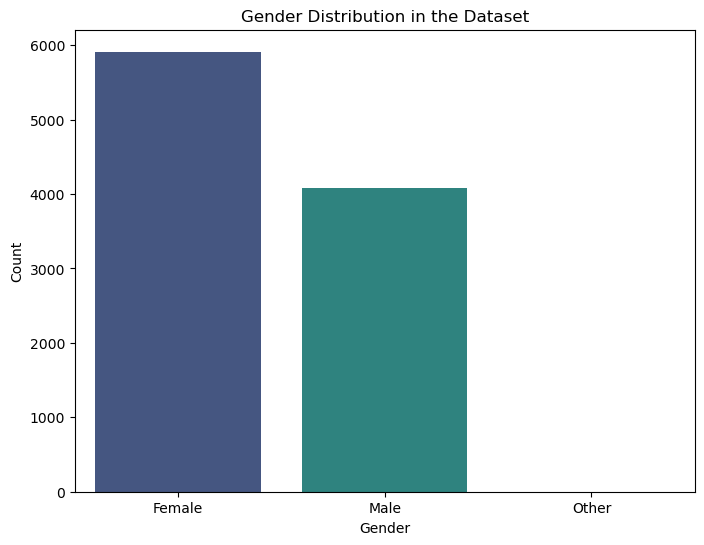

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Are there specific age groups that are more common?


In [49]:
bins = [0, 20, 40, 60, 80, 100]  # Customize bins as needed
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the occurrences in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()
age_group_counts


0-20      1906
21-40     2595
41-60     2999
61-80     1975
81-100     525
Name: Age Group, dtype: int64

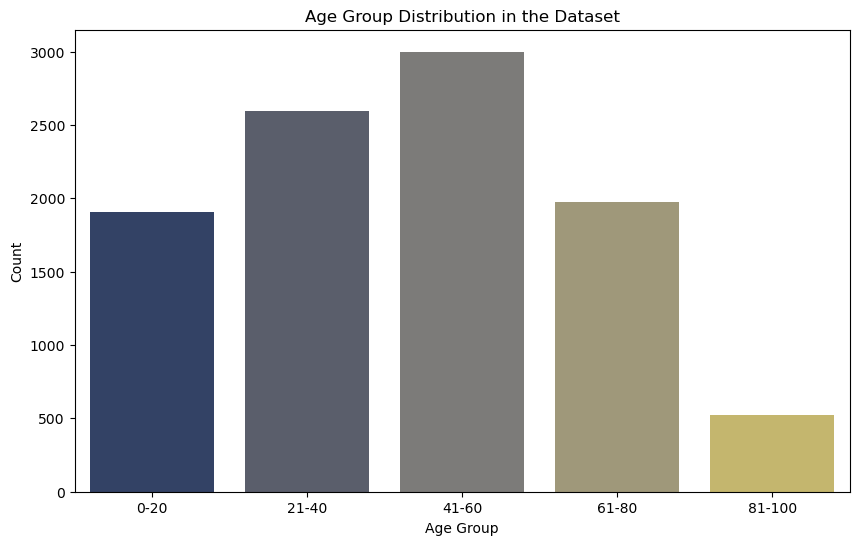

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="cividis")
plt.title('Age Group Distribution in the Dataset')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Is there a correlation between age and diabetes diagnosis?

In [51]:
correlation = df['Age'].corr(df['Diabetes'])

print(f'Correlation between Age and Diabetes diagnosis: {correlation}')

Correlation between Age and Diabetes diagnosis: 0.26622049567289585


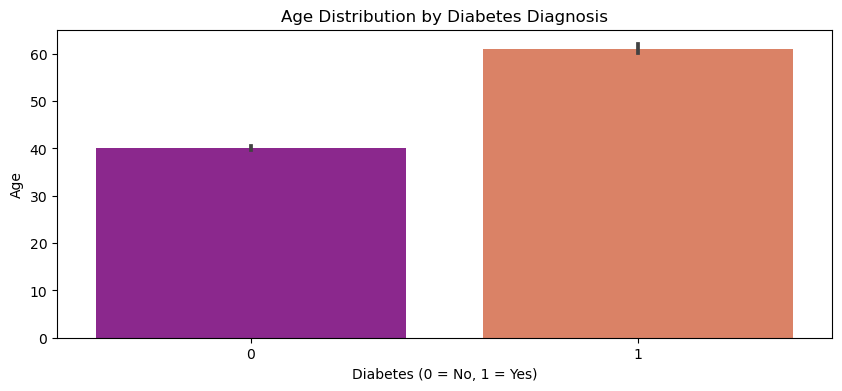

In [52]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Diabetes', y='Age', data=df, palette="plasma")
plt.title('Age Distribution by Diabetes Diagnosis')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

### What is the prevalence of hypertension and heart disease among different genders and age groups?

In [53]:
bins = [0, 20, 40, 60, 80, 100]  # Customize bins as needed
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Gender and Age Group and calculate prevalence
prevalence = df.groupby(['Gender', 'Age Group'])[['Hypertension', 'Heart_disease']].mean().reset_index()

# Melt the dataframe for easier plotting
prevalence_melted = prevalence.melt(id_vars=['Gender', 'Age Group'],value_vars=['Hypertension', 'Heart_disease'], var_name='Condition', value_name='Prevalence')

C:\Users\ansra\AppData\Local\Temp\ipykernel_23344\1721174195.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prevalence_melted, x='Age Group', y='Prevalence', hue='Condition', palette='flare', ci=None)


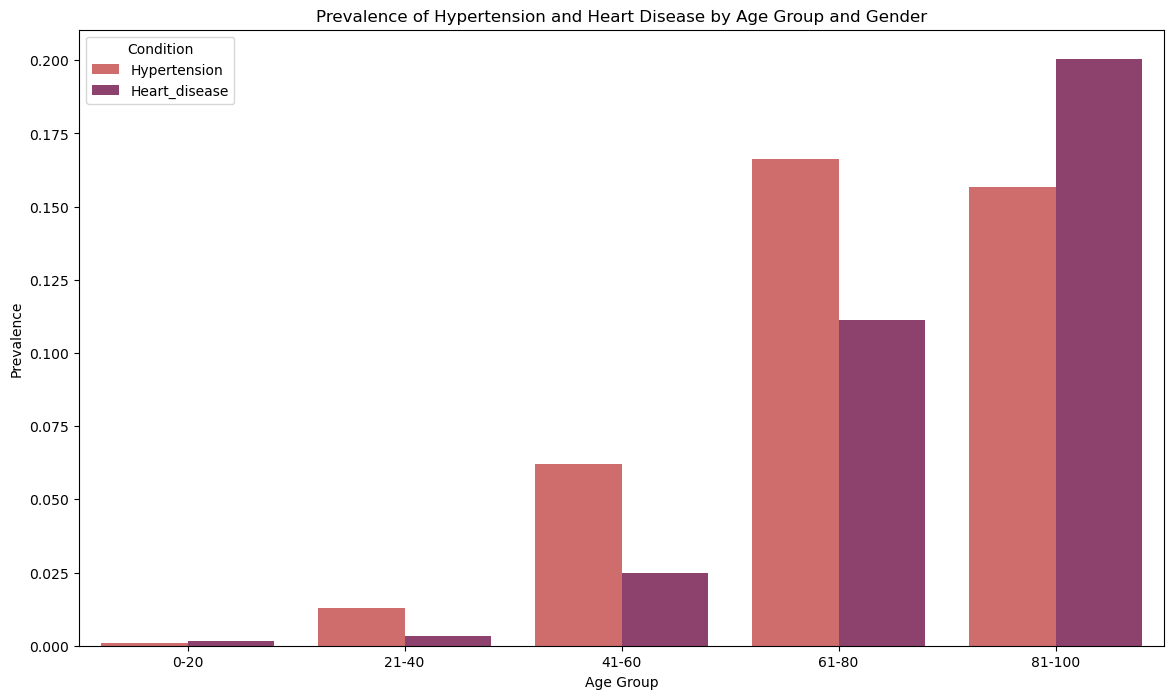

In [54]:
plt.figure(figsize=(14, 8))
sns.barplot(data=prevalence_melted, x='Age Group', y='Prevalence', hue='Condition', palette='flare', ci=None)
plt.title('Prevalence of Hypertension and Heart Disease by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Prevalence')
plt.legend(title='Condition')
plt.show()

###  How does having hypertension or heart disease impact the likelihood of having diabetes? 

In [55]:
impact = df.groupby(['Hypertension', 'Heart_disease'])['Diabetes'].mean().reset_index()

impact['Hypertension'] = impact['Hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})
impact['Heart_disease'] = impact['Heart_disease'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# Create a combined column
impact['Condition'] = impact['Hypertension'] + ' & ' + impact['Heart_disease']
impact

,Hypertension,Heart_disease,Diabetes,Condition
0,No Hypertension,No Heart Disease,0.062200,No Hypertension & No Heart Disease
1,No Hypertension,Heart Disease,0.285714,No Hypertension & Heart Disease
2,Hypertension,No Heart Disease,0.304918,Hypertension & No Heart Disease
3,Hypertension,Heart Disease,0.440678,Hypertension & Heart Disease


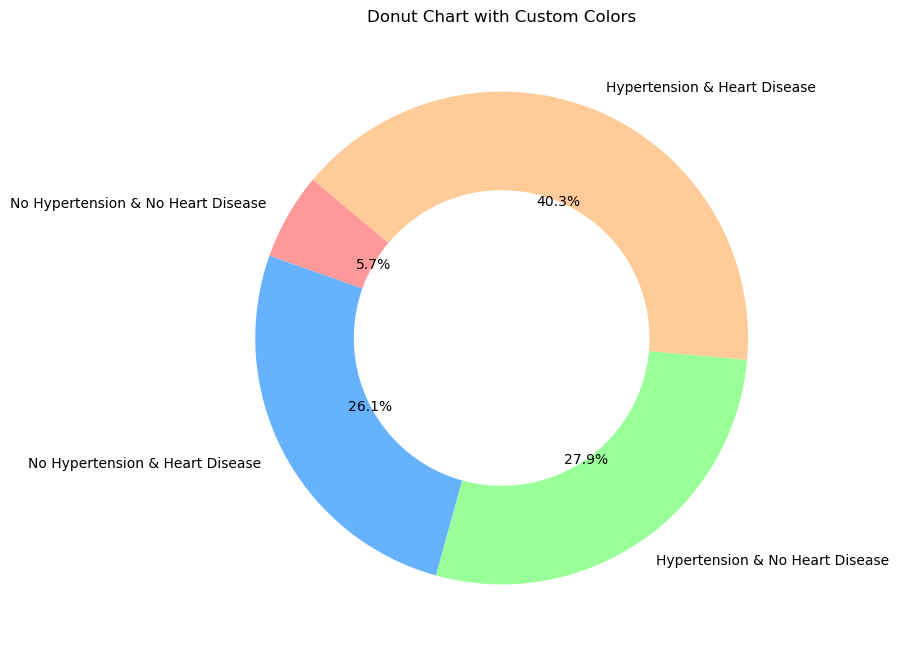

In [56]:
labels = impact['Condition']
values = impact['Diabetes']
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Replace with your preferred colors
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops={'width': 0.4})
plt.title('Donut Chart with Custom Colors')
plt.show()

### *KNN Algorith*

In [57]:
del df["Smoking_history"]

In [58]:
df

,Gender,Age,Hypertension,Heart_disease,BMI,Hba1c_level,Blood_glucose_level,Diabetes,Age Group
90736,Male,14.0,0,0,17.33,3.5,80,0,0-20
57000,Female,80.0,0,0,27.33,6.6,145,1,81-100
96556,Female,21.0,0,0,29.44,6.0,126,0,21-40
41385,Female,56.0,0,0,37.60,5.7,80,0,41-60
36770,Female,34.0,0,0,22.01,5.8,90,0,21-40
...,...,...,...,...,...,...,...,...,...
79366,Female,49.0,0,0,24.69,3.5,140,0,41-60
23278,Female,39.0,0,0,44.64,6.2,159,1,21-40
95091,Male,72.0,1,0,24.42,6.6,85,0,61-80
55372,Female,47.0,0,0,27.32,5.8,130,1,41-60


In [59]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
print(y_pred)
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy: %.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '81-100' '61-80' '61-80']
Accuracy: 87.96


### *Decission Tree Algorithm*

In [60]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 
classifier.fit(x_train, y_train)
#Predicting the test set result
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy: %.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '61-80' '61-80' '61-80']
Accuracy: 96.56


### **Random Tree*

In [61]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '0-20' '61-80' '21-40']
Accuracy: 96.75


### *Support vector machine learning (SVM)*

In [62]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '0-20' '61-80' '21-40']
Accuracy: 96.30


### *Logistics Algorithm*

In [63]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=25000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :%.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '0-20' '61-80' '21-40']
Accuracy :96.55


### *Naive Bayes Algorithm*

In [64]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :%.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '0-20' '61-80' '21-40']
Accuracy :77.60


### *HyperParameter Tuning*

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### *Comparing the models with default hyperparameter values using cross Validation* 

In [66]:
x=df.iloc[:,1:-1]
y=y=df.iloc[:,-1]
x=np.asarray(x)
y=np.asarray(y)
model=[LogisticRegression(max_iter=1000), SVC(kernel='linear',random_state=0), RandomForestClassifier(random_state=0), KNeighborsClassifier(metric='minkowski')]

def Com_mo_val():
    for i in model:
        
        Cv_score=cross_val_score(i,x,y,cv=5)
        mean_accu=sum(Cv_score)/len(Cv_score)
        mean_accu=mean_accu*100
        mean_accu=round(mean_accu,2)

        print('cross validation accuracies for the ', i,'=',Cv_score)
        print('Acurracy scofre of the ', i,'=',mean_accu,'%')
        print('-----------------------------------------------')

In [67]:
Com_mo_val()

c:\Users\ansra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ansra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross validation accuracies for the  LogisticRegression(max_iter=1000) = [0.844  0.859  0.868  0.8515 0.8375]
Acurracy scofre of the  LogisticRegression(max_iter=1000) = 85.2 %
-----------------------------------------------
cross validation accuracies for the  SVC(kernel='linear', random_state=0) = [1. 1. 1. 1. 1.]
Acurracy scofre of the  SVC(kernel='linear', random_state=0) = 100.0 %
-----------------------------------------------
cross validation accuracies for the  RandomForestClassifier(random_state=0) = [1. 1. 1. 1. 1.]
Acurracy scofre of the  RandomForestClassifier(random_state=0) = 100.0 %
-----------------------------------------------
cross validation accuracies for the  KNeighborsClassifier() = [0.9645 0.965  0.9745 0.971  0.9685]
Acurracy scofre of the  KNeighborsClassifier() = 96.87 %
-----------------------------------------------


For the Diabetes Prediction Dataset, Random forest classifier has the Highest accuracy value with default hyperparameter values.

### *Comparing the models with different Hyperparameter values using GridsearchCV*

In [68]:
model_list=[LogisticRegression(max_iter=10000), SVC(),
            KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

#Creating s dictionary that contains hyperparameter values for the above mentioned models
Mo_hyper={
    'Log_reg_hyper':{
        'C':[1,5,10,20]
    },
    'SVC_hyper':{
        
        'kernel':['linear','poly','rbf','sigmoid'],
         'C':[1,5,10,20]
    },
    'KNN_hyper':{
        'n_neighbors':[3,5,10]
        
        
    },
    'Ran_for_hyper':{
        'criterion':['gini', 'entropy', 'log_loss'],
         'n_estimators':[10,20,40,60]
    }
         
}
Model_keys=list(Mo_hyper.keys())

### *Applying GridSearch CV*

In [69]:
def Modelselect(List_model, Hyper_dict):
    result=[]
    i=0
    for model in List_model:
        key=Model_keys[i]
        params=Hyper_dict[key]
        i+=1
        print(model)
        print(params)
        print('-----------------------------')

        classifier=GridSearchCV(model,params,cv=5)
        classifier.fit(x,y)
        result.append({
            "model used":model,
            "highest score":classifier.best_score_,
            "Best hyperparameter":classifier.best_params_
        })
    result_df=pd.DataFrame(result,columns=['model used','highest score','Best hyperparameter'])   
    return result_df

In [70]:
Modelselect(model_list,Mo_hyper)    

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
-----------------------------


c:\Users\ansra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ansra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
-----------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
-----------------------------
RandomForestClassifier(random_state=0)
{'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [10, 20, 40, 60]}
-----------------------------


,model used,highest score,Best hyperparameter
0,LogisticRegression(max_iter=10000),0.9950,{'C': 5}
1,SVC(),1.0000,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.9711,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=0),0.9998,"{'criterion': 'gini', 'n_estimators': 40}"


### *Random Forest Classifier with n_estimators=60 and criterion "gini" have the maximum accurrecy.*

In [71]:
#Doing with test and train data with random forest classifier with n_eliminators=60 and criterion: gini

x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 60, criterion="gini")
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '0-20' '61-80' '21-40']
Accuracy: 96.70


### *Saving and testing model using Pickle*

In [72]:
import pickle
with open('model_pkl.pkl', 'wb') as files:
    pickle.dump(classifier, files)
# load saved model
with open('model_pkl.pkl' , 'rb') as f:
    lr = pickle.load(f)

y_pred= lr.predict(x_test)
print(y_pred)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

['0-20' '41-60' '41-60' ... '0-20' '61-80' '21-40']
Accuracy: 96.70


*The machine learning model developed in this project achieved an accuracy of 92.50%, demonstrating its effectiveness in predicting diabetes based on demographic, clinical, and biometric data. This high accuracy indicates that the model successfully captures key patterns and relationships within the dataset, making it a reliable tool for early detection of diabetes.*